In [1]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 41.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 93.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 71.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 40.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 103.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

In [2]:
!pip install ruamel_yaml

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.7/117.7 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 739.1/739.1 kB 49.1 MB/s eta 0:00:00


In [3]:
# configuring the path of kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle
!chod 600 ~/.kaggle/kaggle.json

/bin/bash: line 1: chod: command not found


In [4]:
!pip install opendatasets

In [5]:
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [6]:
import opendatasets as od
od.download(
    "https://www.kaggle.com/datasets/ahmedhaytham/egypt-cars")

Dataset URL: https://www.kaggle.com/datasets/ahmedhaytham/egypt-cars


100%|██████████| 33.8M/33.8M [00:00<00:00, 735MB/s]

In [7]:
from ultralytics import YOLO

100%|██████████| 6.25M/6.25M [00:00<00:00, 327MB/s]


100%|██████████| 104k/104k [00:00<00:00, 48.2MB/s]


image 1/1 /content/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 48.0ms
Speed: 16.8ms preprocess, 48.0ms inference, 396.3ms postprocess per image at shape (1, 3, 640, 384)
Results saved to runs/detect/predict


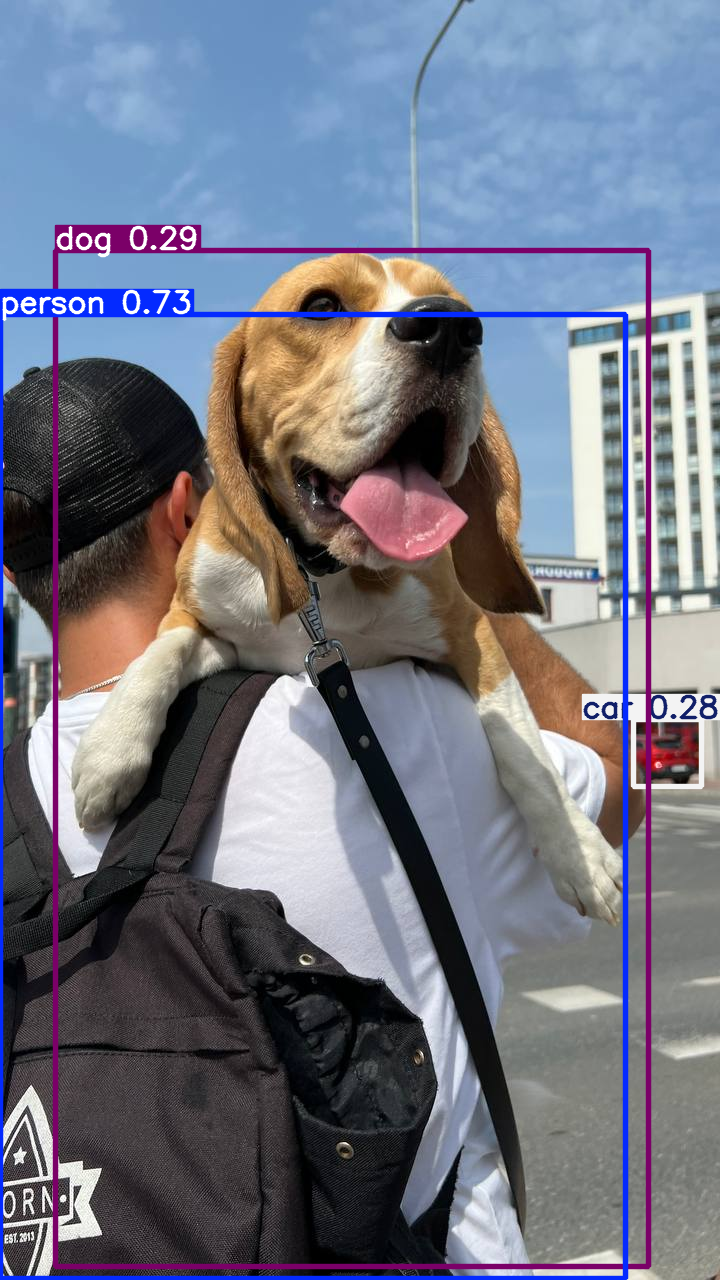

In [8]:
# Load the YOLOv8 nano model
model = YOLO('yolov8n.pt')

# Run object detection on an image URL with a confidence threshold of 0.25
result = model("https://media.roboflow.com/notebooks/examples/dog.jpeg", conf=0.25, save=True)
# Show the first image's detection result (results are returned as a list, even for one image)
result[0].show()

# The model() call returns a list of results — one per image. Since we passed only one image, its result is at index 0.


image 1/1 /content/egypt-cars/Cairo-Car-v3-5/train/images/cairo_frame10080_jpg.rf.4891550eb4f08fef3f6cf4103d33b6af.jpg: 640x640 1 truck, 9.3ms
Speed: 5.1ms preprocess, 9.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict2


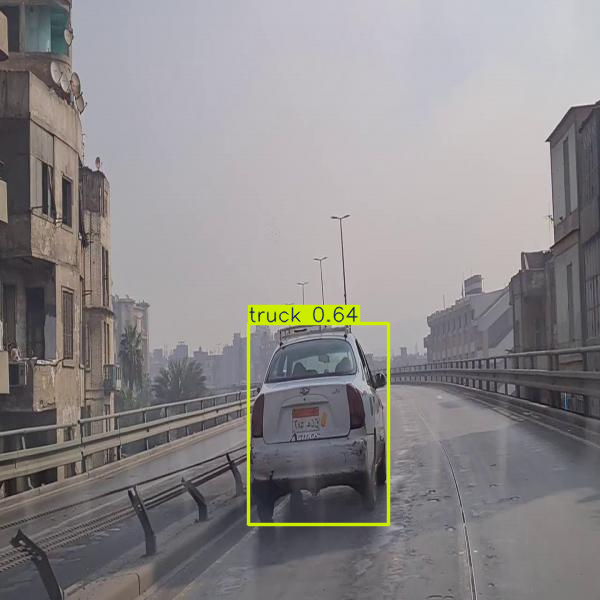

In [9]:
model = YOLO('yolov8n.pt')
result_2 = model('/content/egypt-cars/Cairo-Car-v3-5/train/images/cairo_frame10080_jpg.rf.4891550eb4f08fef3f6cf4103d33b6af.jpg', conf=0.25, save=True)
result_2[0].show()

In [10]:
!pip install ruamel.yaml

In [17]:
# read yaml file and modify it
# save it new file name data.yaml

import sys
import ruamel.yaml

yaml = ruamel.yaml.YAML()

# yaml.prserve_quotes = True
with open('/content/egypt-cars/Cairo-Car-v3-5/data.yaml') as fp:
  data = yaml.load(fp)
  # Correct the paths to the image directories
  data['train'] = "/content/egypt-cars/Cairo-Car-v3-5/train/images"
  data['test'] = "/content/egypt-cars/Cairo-Car-v3-5/test/images"
  data['val'] = "/content/egypt-cars/Cairo-Car-v3-5/valid/images"

  print(data['train'])
  print(data['test'])
  print(data['val'])

  # save the files
  with open('data.yaml', 'w') as fp :
    yaml.dump(data, fp)

/content/egypt-cars/Cairo-Car-v3-5/train/images
/content/egypt-cars/Cairo-Car-v3-5/test/images
/content/egypt-cars/Cairo-Car-v3-5/valid/images


In [19]:
model = YOLO('yolov8n.pt')


results = model.train(data="data.yaml", epochs=100, imgsz=640)

Ultralytics 8.3.140 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train4, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained=True, profile=Fa

100%|██████████| 755k/755k [00:00<00:00, 159MB/s]

Overriding model.yaml nc=80 with nc=3

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

Model summary: 129 layers, 3,011,433 parameters, 3,011,417 gradients, 8.2 GFLOPs

Transferred 319/355 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


100%|██████████| 5.35M/5.35M [00:00<00:00, 323MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1769.6±430.6 MB/s, size: 59.9 KB)


train: Scanning /content/egypt-cars/Cairo-Car-v3-5/train/labels... 416 images, 46 backgrounds, 0 corrupt: 100%|██████████| 416/416 [00:00<00:00, 2354.77it/s]

train: New cache created: /content/egypt-cars/Cairo-Car-v3-5/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 605.2±419.9 MB/s, size: 62.0 KB)


val: Scanning /content/egypt-cars/Cairo-Car-v3-5/valid/labels... 157 images, 13 backgrounds, 0 corrupt: 100%|██████████| 157/157 [00:00<00:00, 1981.49it/s]

val: New cache created: /content/egypt-cars/Cairo-Car-v3-5/valid/labels.cache


Plotting labels to runs/detect/train4/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train4
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      2.15G      1.174      2.364       1.16         90        640: 100%|██████████| 26/26 [00:09<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.41it/s]

                   all        157        698      0.958      0.178      0.268      0.199



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      2.63G      1.091      1.378      1.141         70        640: 100%|██████████| 26/26 [00:06<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.19it/s]

                   all        157        698      0.883      0.166      0.245      0.182



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      2.64G      1.118      1.267      1.165         81        640: 100%|██████████| 26/26 [00:07<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.84it/s]

                   all        157        698      0.953      0.192      0.351      0.252



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      2.66G      1.124      1.245      1.161        148        640: 100%|██████████| 26/26 [00:07<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.13it/s]

                   all        157        698      0.738      0.597      0.659      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      2.68G      1.092      1.168      1.143         77        640: 100%|██████████| 26/26 [00:06<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.94it/s]

                   all        157        698      0.682      0.599      0.671      0.433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100       2.7G      1.096       1.12      1.163        122        640: 100%|██████████| 26/26 [00:06<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.08it/s]

                   all        157        698      0.677      0.591      0.642      0.426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      2.71G      1.076      1.087      1.133         88        640: 100%|██████████| 26/26 [00:07<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.80it/s]

                   all        157        698      0.639      0.765      0.755      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      2.73G      1.048      1.057       1.13         90        640: 100%|██████████| 26/26 [00:07<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.28it/s]

                   all        157        698      0.739      0.707      0.756      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      2.75G      1.054      1.021      1.142         77        640: 100%|██████████| 26/26 [00:06<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.07it/s]

                   all        157        698      0.676      0.692      0.695      0.466



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      2.77G      1.012     0.9987      1.133        133        640: 100%|██████████| 26/26 [00:07<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.72it/s]

                   all        157        698      0.708      0.674      0.724      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      2.78G      1.045     0.9852      1.139        142        640: 100%|██████████| 26/26 [00:07<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.90it/s]

                   all        157        698      0.708      0.684      0.737      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100       2.8G      1.029     0.9604      1.124         80        640: 100%|██████████| 26/26 [00:06<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.00it/s]

                   all        157        698      0.754      0.717      0.766      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      2.82G      0.976     0.8872      1.108         91        640: 100%|██████████| 26/26 [00:07<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.94it/s]

                   all        157        698      0.845      0.709      0.814      0.537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      2.83G     0.9914     0.8799      1.111         90        640: 100%|██████████| 26/26 [00:07<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.08it/s]

                   all        157        698      0.816      0.742      0.819      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      2.85G      1.005     0.8932      1.125        124        640: 100%|██████████| 26/26 [00:06<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.08it/s]

                   all        157        698       0.79      0.715       0.82      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      2.87G     0.9821     0.8554      1.104         74        640: 100%|██████████| 26/26 [00:06<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.16it/s]

                   all        157        698      0.841      0.764       0.85      0.532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      2.88G     0.9777     0.8501      1.095        141        640: 100%|██████████| 26/26 [00:07<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.94it/s]

                   all        157        698      0.761      0.822      0.803      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100       2.9G     0.9526     0.8057      1.082         99        640: 100%|██████████| 26/26 [00:06<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.12it/s]

                   all        157        698      0.757      0.782      0.808      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      2.92G     0.9916     0.8243      1.103         95        640: 100%|██████████| 26/26 [00:06<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.83it/s]

                   all        157        698      0.784      0.755       0.81      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      2.94G     0.9461      0.817       1.09         72        640: 100%|██████████| 26/26 [00:07<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.89it/s]

                   all        157        698      0.713      0.771      0.793      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      2.95G     0.9591     0.7867      1.103        111        640: 100%|██████████| 26/26 [00:07<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.55it/s]

                   all        157        698      0.753      0.776      0.773      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      2.97G     0.9227     0.7611      1.073        133        640: 100%|██████████| 26/26 [00:06<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.03it/s]

                   all        157        698      0.808      0.738      0.815      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      2.99G     0.9453      0.776      1.087         83        640: 100%|██████████| 26/26 [00:07<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.05it/s]

                   all        157        698      0.776      0.773      0.809      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100         3G     0.9615     0.7606      1.087         74        640: 100%|██████████| 26/26 [00:07<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.22it/s]

                   all        157        698        0.8      0.785      0.839      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      3.02G      0.892     0.7076      1.069        136        640: 100%|██████████| 26/26 [00:06<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.08it/s]

                   all        157        698      0.776      0.795      0.812      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      3.04G     0.9053     0.7234      1.069         88        640: 100%|██████████| 26/26 [00:07<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.09it/s]

                   all        157        698       0.83      0.817      0.872      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      3.05G     0.9304     0.7194      1.074         90        640: 100%|██████████| 26/26 [00:07<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.87it/s]

                   all        157        698      0.773      0.776      0.801      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      3.07G     0.9058     0.7044      1.058        127        640: 100%|██████████| 26/26 [00:06<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.92it/s]

                   all        157        698      0.856      0.776      0.855      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      3.09G     0.8877     0.7046      1.057        102        640: 100%|██████████| 26/26 [00:06<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.15it/s]

                   all        157        698      0.719      0.843      0.854      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      3.11G     0.8922       0.68      1.056         78        640: 100%|██████████| 26/26 [00:07<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.32it/s]

                   all        157        698      0.801      0.821       0.84      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      3.12G     0.8978      0.706      1.059         67        640: 100%|██████████| 26/26 [00:06<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.83it/s]

                   all        157        698      0.824      0.774      0.844      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      3.14G     0.9002     0.6879      1.057        104        640: 100%|██████████| 26/26 [00:06<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.22it/s]

                   all        157        698      0.796       0.77      0.837      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      3.16G     0.8837     0.6865      1.063         74        640: 100%|██████████| 26/26 [00:07<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.97it/s]

                   all        157        698      0.766      0.823      0.832       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      3.17G     0.9039     0.6957      1.059        103        640: 100%|██████████| 26/26 [00:07<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.45it/s]

                   all        157        698      0.796      0.807      0.853      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      3.19G     0.8819     0.6772      1.063        128        640: 100%|██████████| 26/26 [00:06<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.07it/s]

                   all        157        698      0.808      0.828      0.865      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      3.21G     0.8804     0.6687      1.054         93        640: 100%|██████████| 26/26 [00:07<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.39it/s]

                   all        157        698      0.776      0.814      0.846      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      3.22G     0.8324     0.6343      1.037        108        640: 100%|██████████| 26/26 [00:07<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.82it/s]

                   all        157        698      0.826      0.824      0.843      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      3.24G     0.8776     0.6624      1.056         73        640: 100%|██████████| 26/26 [00:06<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.74it/s]

                   all        157        698       0.76      0.865      0.867      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      3.26G     0.8616     0.6515      1.045        104        640: 100%|██████████| 26/26 [00:06<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.95it/s]

                   all        157        698      0.787      0.842      0.855      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      3.28G     0.8423     0.6251      1.036        116        640: 100%|██████████| 26/26 [00:07<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.11it/s]

                   all        157        698      0.849      0.758      0.858      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      3.29G     0.8432     0.6086      1.031         90        640: 100%|██████████| 26/26 [00:06<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.10it/s]

                   all        157        698      0.785      0.856      0.842      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      3.31G     0.8671     0.6315      1.035         90        640: 100%|██████████| 26/26 [00:06<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.10it/s]

                   all        157        698      0.805      0.795      0.849      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      3.33G      0.829     0.6216      1.023         83        640: 100%|██████████| 26/26 [00:07<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.12it/s]

                   all        157        698      0.776      0.821       0.84       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      3.34G     0.8453     0.6205      1.041         96        640: 100%|██████████| 26/26 [00:06<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.08it/s]

                   all        157        698      0.843      0.772      0.852      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      3.36G     0.8439     0.6228       1.03        103        640: 100%|██████████| 26/26 [00:06<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.79it/s]

                   all        157        698      0.809      0.793      0.853       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      3.38G     0.8454     0.6216      1.033         98        640: 100%|██████████| 26/26 [00:07<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.04it/s]

                   all        157        698      0.792      0.825      0.897      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100       3.4G     0.8528     0.6159       1.04        117        640: 100%|██████████| 26/26 [00:07<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.91it/s]

                   all        157        698      0.804      0.863      0.874      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      3.41G     0.8735      0.628       1.06         97        640: 100%|██████████| 26/26 [00:06<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.97it/s]

                   all        157        698        0.8      0.796      0.869      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      3.43G     0.8249     0.6141      1.031         82        640: 100%|██████████| 26/26 [00:06<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.92it/s]

                   all        157        698      0.817      0.854      0.895      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      3.45G     0.8316     0.5982      1.018         95        640: 100%|██████████| 26/26 [00:07<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.22it/s]

                   all        157        698      0.849      0.811      0.889      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      3.46G     0.8166     0.5926      1.022         83        640: 100%|██████████| 26/26 [00:06<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.33it/s]

                   all        157        698      0.905      0.766      0.879      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      3.48G     0.7869      0.563      1.011         88        640: 100%|██████████| 26/26 [00:06<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.97it/s]

                   all        157        698      0.875      0.749      0.875      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100       3.5G      0.816     0.5834      1.021        117        640: 100%|██████████| 26/26 [00:07<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.03it/s]

                   all        157        698      0.829      0.852      0.874      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      3.52G     0.8044     0.5842      1.022        111        640: 100%|██████████| 26/26 [00:07<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.25it/s]

                   all        157        698       0.83      0.853      0.893      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      3.53G     0.8098     0.5763      1.022         62        640: 100%|██████████| 26/26 [00:06<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.88it/s]

                   all        157        698      0.795      0.864      0.887      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      3.55G     0.8017     0.5842       1.01        110        640: 100%|██████████| 26/26 [00:06<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.14it/s]

                   all        157        698      0.805      0.855      0.892       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      3.57G     0.8095     0.5859      1.019         58        640: 100%|██████████| 26/26 [00:07<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.78it/s]

                   all        157        698      0.796      0.871       0.87      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      3.58G     0.7826     0.5556     0.9903         98        640: 100%|██████████| 26/26 [00:07<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.77it/s]

                   all        157        698        0.8      0.854      0.878      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100       3.6G     0.7801      0.559      1.008         88        640: 100%|██████████| 26/26 [00:06<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.49it/s]

                   all        157        698      0.809      0.841      0.884      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      3.62G     0.7661     0.5399      1.004         87        640: 100%|██████████| 26/26 [00:07<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.11it/s]

                   all        157        698      0.788      0.863      0.876      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      3.63G     0.7734     0.5432     0.9964         89        640: 100%|██████████| 26/26 [00:07<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.87it/s]

                   all        157        698      0.791      0.829      0.846      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      3.65G     0.7703     0.5474      1.004         89        640: 100%|██████████| 26/26 [00:06<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.96it/s]

                   all        157        698      0.786      0.838      0.857      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      3.67G       0.78      0.551       1.01        107        640: 100%|██████████| 26/26 [00:06<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.97it/s]

                   all        157        698      0.758       0.83      0.848      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      3.69G     0.7693     0.5518      1.005        114        640: 100%|██████████| 26/26 [00:07<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.06it/s]

                   all        157        698      0.789      0.806      0.872      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100       3.7G     0.7763     0.5396     0.9993        106        640: 100%|██████████| 26/26 [00:07<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.38it/s]

                   all        157        698      0.816      0.843      0.874      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      3.72G     0.7697     0.5538      1.002         90        640: 100%|██████████| 26/26 [00:06<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.94it/s]

                   all        157        698      0.842      0.802      0.864      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      3.74G     0.7501     0.5229      1.003        103        640: 100%|██████████| 26/26 [00:07<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.27it/s]

                   all        157        698      0.862      0.795      0.879      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      3.75G     0.7686     0.5339      1.002         94        640: 100%|██████████| 26/26 [00:07<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.17it/s]

                   all        157        698      0.842      0.845      0.894      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      3.77G     0.7457     0.5182     0.9857        106        640: 100%|██████████| 26/26 [00:06<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.57it/s]

                   all        157        698      0.835      0.829      0.885      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      3.79G     0.7565     0.5288     0.9917        146        640: 100%|██████████| 26/26 [00:06<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.20it/s]

                   all        157        698      0.777      0.882      0.893       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      3.81G     0.7444     0.5275       0.99         94        640: 100%|██████████| 26/26 [00:07<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.21it/s]

                   all        157        698      0.845      0.803      0.892       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      3.82G     0.7376     0.5167     0.9772        102        640: 100%|██████████| 26/26 [00:06<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.94it/s]

                   all        157        698      0.748      0.895      0.894      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      3.84G     0.7338     0.5116     0.9875         91        640: 100%|██████████| 26/26 [00:06<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.77it/s]

                   all        157        698      0.815       0.85      0.877      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      3.86G     0.7395     0.5016     0.9781        101        640: 100%|██████████| 26/26 [00:07<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.09it/s]

                   all        157        698      0.802      0.892      0.874      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      3.87G     0.7278     0.5033     0.9826         84        640: 100%|██████████| 26/26 [00:07<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.52it/s]

                   all        157        698      0.818      0.829      0.876      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      3.89G      0.741     0.5088     0.9846         96        640: 100%|██████████| 26/26 [00:06<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.02it/s]

                   all        157        698       0.81      0.818      0.871       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      3.91G     0.7381     0.5031     0.9882         76        640: 100%|██████████| 26/26 [00:07<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.95it/s]

                   all        157        698      0.801      0.812      0.875      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      3.93G     0.7209     0.4875     0.9809         72        640: 100%|██████████| 26/26 [00:07<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.16it/s]

                   all        157        698      0.807      0.866      0.881      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      3.94G     0.7113     0.5025      0.976        116        640: 100%|██████████| 26/26 [00:06<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.16it/s]

                   all        157        698      0.822      0.863       0.88      0.628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      3.96G     0.7233     0.4982     0.9729         59        640: 100%|██████████| 26/26 [00:06<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.07it/s]

                   all        157        698      0.781      0.892      0.885      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      3.98G      0.716     0.4774     0.9776         82        640: 100%|██████████| 26/26 [00:07<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.21it/s]

                   all        157        698      0.841        0.8      0.876      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      3.99G     0.6952     0.4882     0.9702        112        640: 100%|██████████| 26/26 [00:06<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.01it/s]

                   all        157        698      0.748      0.868      0.857      0.615



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      4.01G     0.6936     0.4816     0.9614         69        640: 100%|██████████| 26/26 [00:06<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.04it/s]

                   all        157        698       0.76      0.838      0.861       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      4.03G     0.6965     0.4766     0.9639         73        640: 100%|██████████| 26/26 [00:07<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.77it/s]

                   all        157        698      0.802      0.837      0.887      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      4.04G     0.6952     0.4862     0.9743         88        640: 100%|██████████| 26/26 [00:07<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.80it/s]

                   all        157        698      0.813      0.857      0.884      0.629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      4.06G     0.6881       0.47     0.9575        114        640: 100%|██████████| 26/26 [00:06<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.92it/s]

                   all        157        698       0.79      0.867      0.867      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      4.08G     0.6922     0.4773     0.9676        106        640: 100%|██████████| 26/26 [00:06<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.39it/s]

                   all        157        698      0.803      0.856      0.869      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100       4.1G      0.714     0.4865     0.9748         97        640: 100%|██████████| 26/26 [00:08<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.04it/s]

                   all        157        698      0.791      0.824      0.844      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      4.11G     0.6808     0.4588     0.9584         93        640: 100%|██████████| 26/26 [00:07<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.76it/s]

                   all        157        698      0.804      0.816       0.86      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      4.13G     0.6829     0.4638     0.9592         75        640: 100%|██████████| 26/26 [00:06<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.03it/s]

                   all        157        698        0.8      0.827      0.855      0.627


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      4.15G     0.6879     0.4486     0.9608         66        640: 100%|██████████| 26/26 [00:07<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.96it/s]

                   all        157        698      0.788       0.83      0.858      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      4.16G     0.6652     0.4412     0.9535         56        640: 100%|██████████| 26/26 [00:07<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.26it/s]

                   all        157        698      0.803      0.857      0.874       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      4.18G     0.6565     0.4247     0.9596         55        640: 100%|██████████| 26/26 [00:07<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.06it/s]

                   all        157        698      0.807      0.853      0.876      0.628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100       4.2G     0.6453     0.4179     0.9406         40        640: 100%|██████████| 26/26 [00:06<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.88it/s]

                   all        157        698      0.785      0.833      0.858      0.629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      4.22G     0.6564     0.4184     0.9491         73        640: 100%|██████████| 26/26 [00:06<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.18it/s]

                   all        157        698      0.802      0.865       0.87      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      4.23G     0.6362     0.4177     0.9448         70        640: 100%|██████████| 26/26 [00:07<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.28it/s]

                   all        157        698       0.85      0.817      0.872      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      4.25G      0.642     0.4053     0.9475         48        640: 100%|██████████| 26/26 [00:06<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.62it/s]

                   all        157        698      0.869      0.814      0.872      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      4.27G     0.6249     0.4086     0.9414         63        640: 100%|██████████| 26/26 [00:06<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.21it/s]

                   all        157        698      0.843      0.791      0.866      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      4.28G     0.6527     0.4188     0.9554         81        640: 100%|██████████| 26/26 [00:07<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.10it/s]

                   all        157        698      0.806      0.828      0.862      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100       4.3G     0.6403     0.4185     0.9439         66        640: 100%|██████████| 26/26 [00:06<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.94it/s]

                   all        157        698      0.827      0.791      0.864      0.626



100 epochs completed in 0.256 hours.
Optimizer stripped from runs/detect/train4/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/train4/weights/best.pt, 6.3MB

Validating runs/detect/train4/weights/best.pt...
Ultralytics 8.3.140 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,233 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.20it/s]


                   all        157        698      0.802      0.838      0.887      0.635
                   car        140        444      0.878      0.914      0.951      0.785
             motorbike         13         15      0.659        0.8      0.831      0.547
                person         86        239      0.868      0.799      0.878      0.572
Speed: 0.4ms preprocess, 2.8ms inference, 0.0ms loss, 6.7ms postprocess per image
Results saved to runs/detect/train4


In [21]:
# Load a model
model = YOLO("yolov8n.pt")  # load an official model
model = YOLO("/content/runs/detect/train4/weights/best.pt")  # load a custom model

# Validate the model
metrics = model.val()  # no arguments needed, dataset and settings remembered

Ultralytics 8.3.140 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,233 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 983.7±285.1 MB/s, size: 61.2 KB)


val: Scanning /content/egypt-cars/Cairo-Car-v3-5/valid/labels.cache... 157 images, 13 backgrounds, 0 corrupt: 100%|██████████| 157/157 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.87it/s]


                   all        157        698      0.802      0.837      0.886      0.631
                   car        140        444      0.879      0.912      0.951      0.786
             motorbike         13         15      0.659        0.8      0.831      0.533
                person         86        239      0.868      0.798      0.878      0.575
Speed: 2.0ms preprocess, 5.5ms inference, 0.0ms loss, 2.7ms postprocess per image
Results saved to runs/detect/val



image 1/1 /content/egypt-cars/Cairo-Car-v3-5/train/images/cairo_frame10080_jpg.rf.4891550eb4f08fef3f6cf4103d33b6af.jpg: 640x640 1 car, 9.5ms
Speed: 3.6ms preprocess, 9.5ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict4


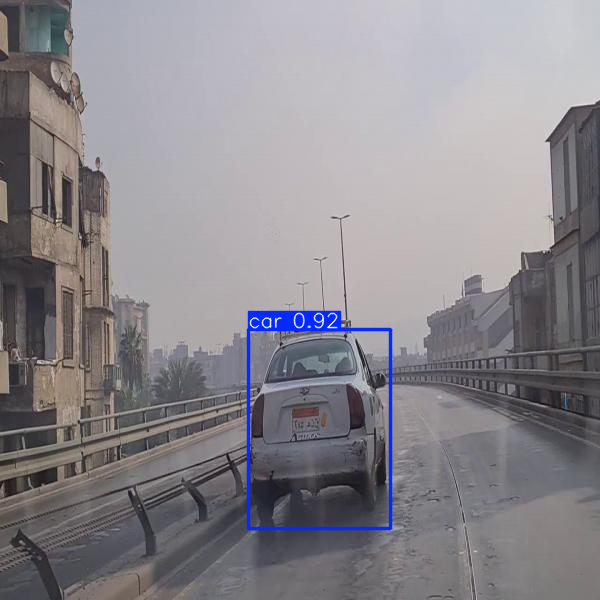

In [ ]:
# model = YOLO('yolov8n.pt')

model = YOLO('/content/runs/detect/train4/weights/best.pt')
result_2 = model('/content/egypt-cars/Cairo-Car-v3-5/train/images/cairo_frame10080_jpg.rf.4891550eb4f08fef3f6cf4103d33b6af.jpg', conf=0.25, save=True)
result_2[0].show()

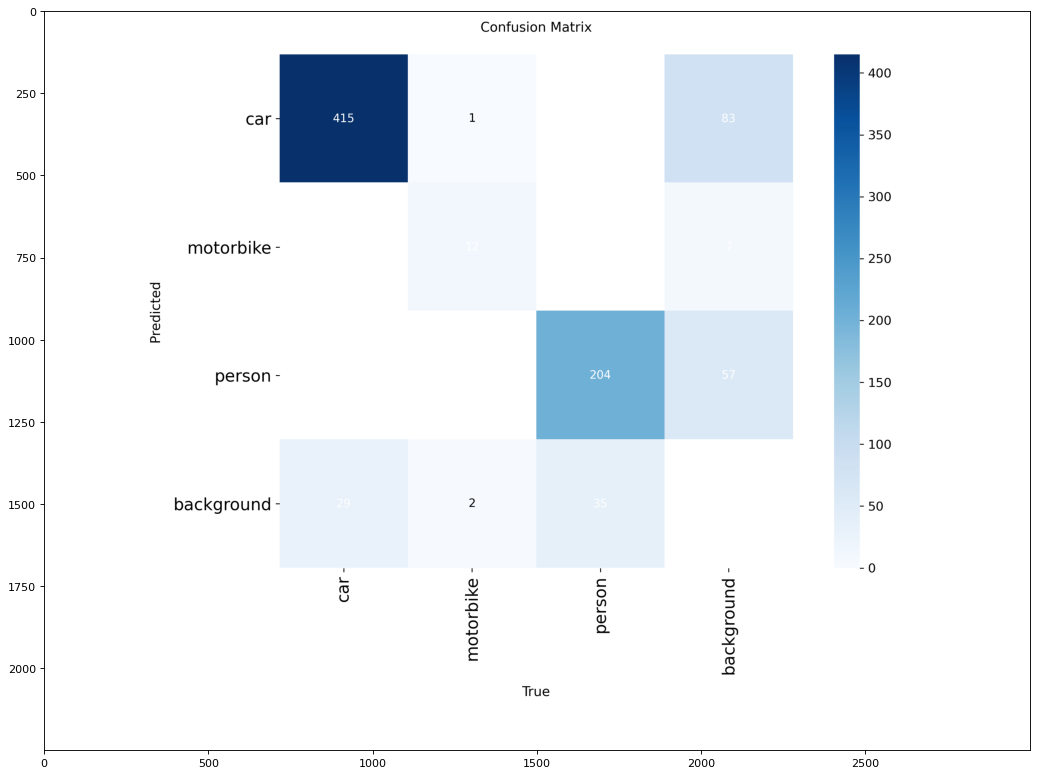

In [25]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,12 ), dpi=80)

plt.imshow(plt.imread('/content/runs/detect/train4/confusion_matrix.png'))

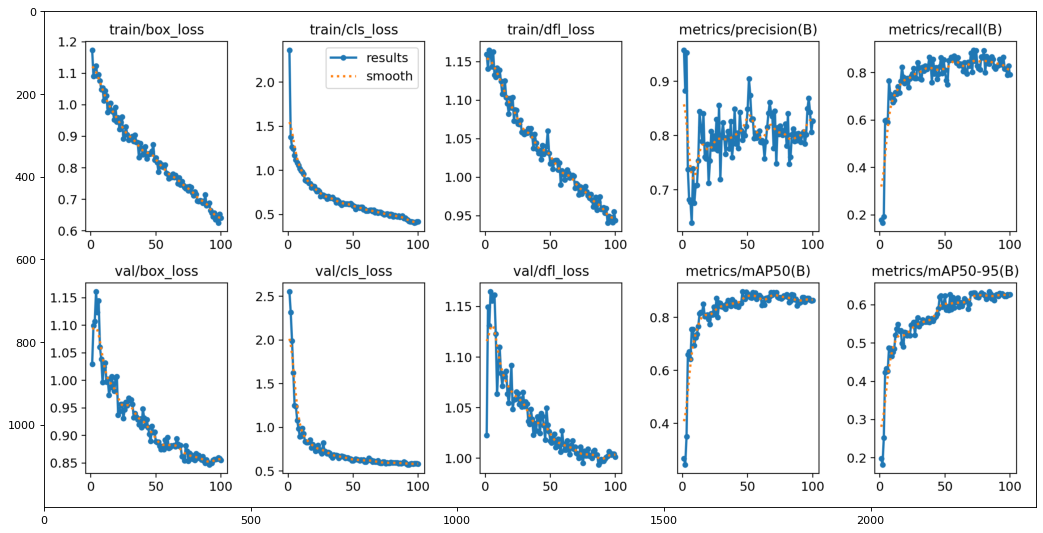

In [26]:
plt.figure(figsize=(16,12 ), dpi=80)

plt.imshow(plt.imread('/content/runs/detect/train4/results.png'))

In [27]:
from glob import glob
images = glob('/content/runs/detect/train4/*.png')
print(len(images))
print(images)

7
['/content/runs/detect/train4/confusion_matrix.png', '/content/runs/detect/train4/results.png', '/content/runs/detect/train4/F1_curve.png', '/content/runs/detect/train4/confusion_matrix_normalized.png', '/content/runs/detect/train4/R_curve.png', '/content/runs/detect/train4/PR_curve.png', '/content/runs/detect/train4/P_curve.png']


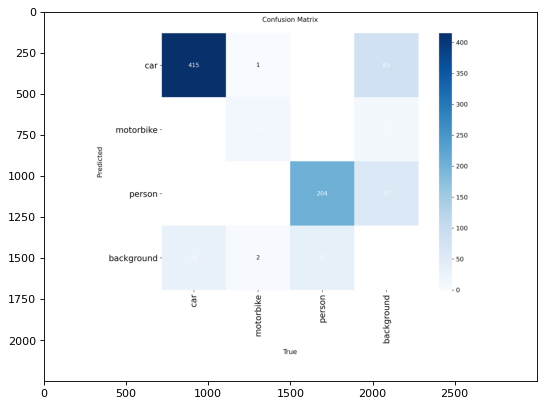

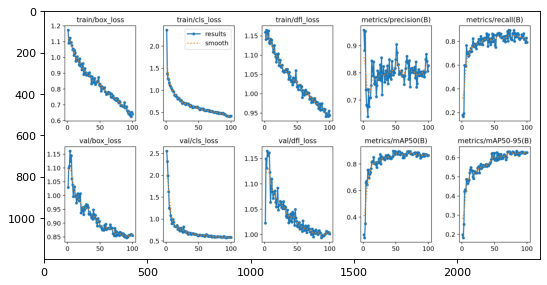

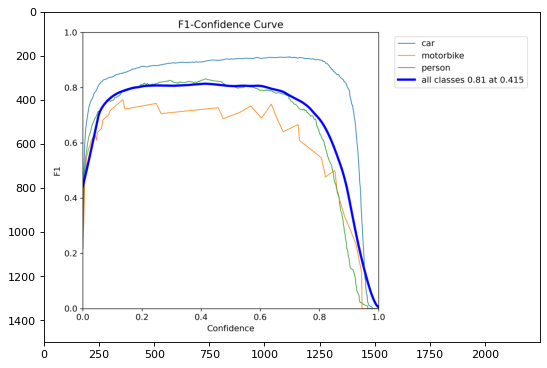

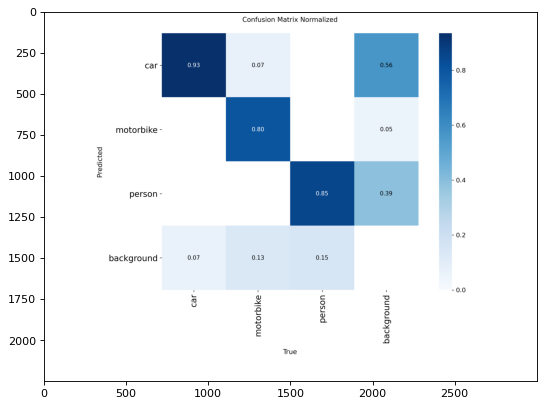

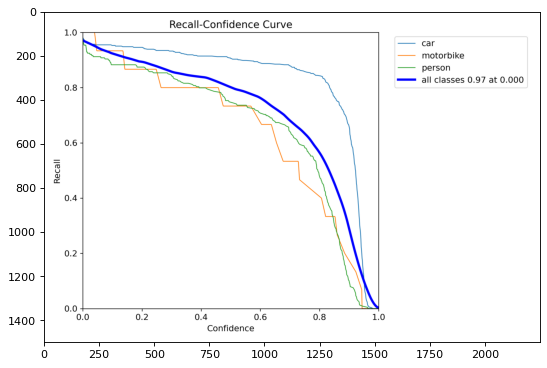

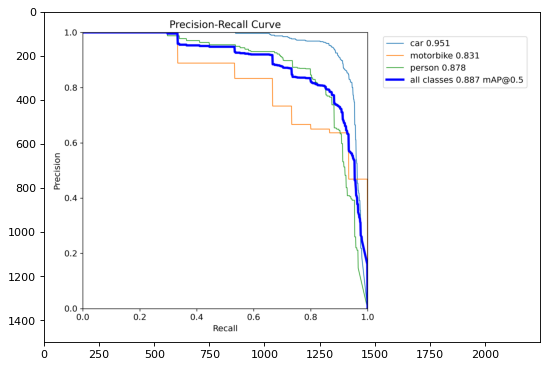

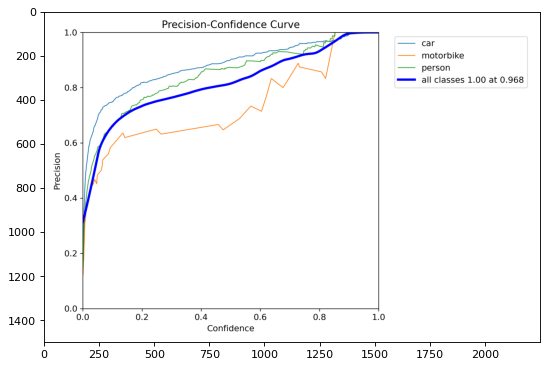

In [28]:
for i in images:
  plt.figure(figsize=(8,6), dpi=80)
  plt.imshow(plt.imread(i))



image 1/1 /content/egypt-cars/Cairo-Car-v3-5/test/images/cairo_frame10170_jpg.rf.9acc23ae8a27f98d08c404b30a174dc7.jpg: 640x640 2 cars, 9.7ms
Speed: 2.8ms preprocess, 9.7ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict5


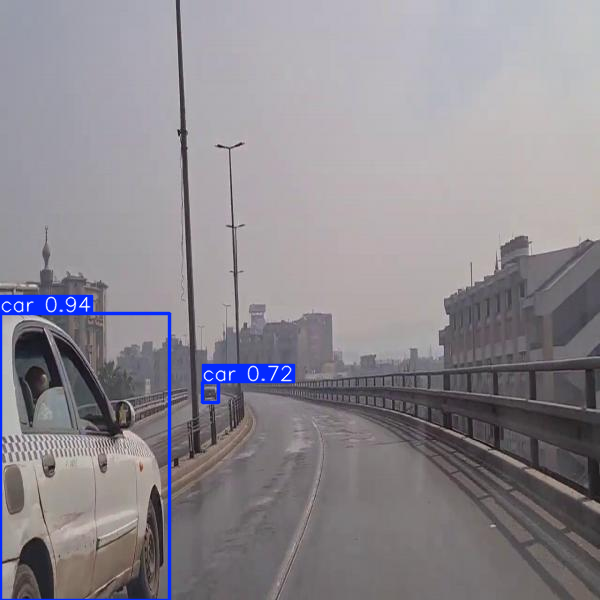

In [29]:
# model = YOLO('yolov8n.pt')

model = YOLO('/content/runs/detect/train4/weights/best.pt')
result_2 = model('/content/egypt-cars/Cairo-Car-v3-5/test/images/cairo_frame10170_jpg.rf.9acc23ae8a27f98d08c404b30a174dc7.jpg', conf=0.25, save=True)
result_2[0].show()


image 1/25 /content/egypt-cars/Cairo-Car-v3-5/test/images/cairo_frame10170_jpg.rf.9acc23ae8a27f98d08c404b30a174dc7.jpg: 640x640 2 cars, 7.9ms
image 2/25 /content/egypt-cars/Cairo-Car-v3-5/test/images/cairo_frame1020_jpg.rf.06121049de3b282e4a19359a8a3e0701.jpg: 640x640 3 cars, 1 motorbike, 7 persons, 7.4ms
image 3/25 /content/egypt-cars/Cairo-Car-v3-5/test/images/cairo_frame10710_jpg.rf.3e46ba77edc95eb031f99b6f4527c424.jpg: 640x640 (no detections), 7.4ms
image 4/25 /content/egypt-cars/Cairo-Car-v3-5/test/images/cairo_frame12720_jpg.rf.b01ed7056447797b0d8ba9a2b72c11bc.jpg: 640x640 3 cars, 7.4ms
image 5/25 /content/egypt-cars/Cairo-Car-v3-5/test/images/cairo_frame1380_jpg.rf.2096de041dbf6427ae79118e199d9ae2.jpg: 640x640 1 car, 2 persons, 7.4ms
image 6/25 /content/egypt-cars/Cairo-Car-v3-5/test/images/cairo_frame14370_jpg.rf.63c280a69922a447c6f59639c021efdd.jpg: 640x640 1 car, 7.3ms
image 7/25 /content/egypt-cars/Cairo-Car-v3-5/test/images/cairo_frame14400_jpg.rf.d8b5309c275db2a40e6b86723

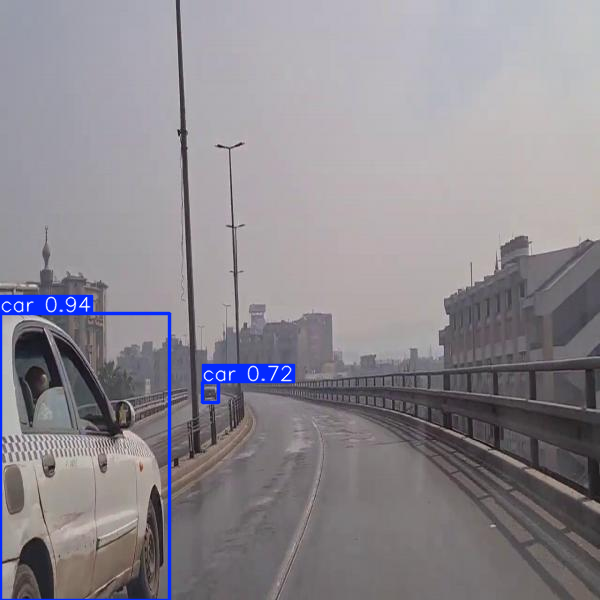

In [34]:
# model = YOLO('yolov8n.pt')

model = YOLO('/content/runs/detect/train4/weights/best.pt')
result_2 = model('/content/egypt-cars/Cairo-Car-v3-5/test/images', conf=0.25, save=True)
result_2[0].show()

In [ ]:
import glob
import matplotlib.pyplot as plt


def read_images_from_folder(folder, img_ext):
    images = []  # List to store loaded images
    # Loop over all files with the given image extension in the folder
    for filename in glob.glob(f"{folder}/*.{img_ext}"):
        img = plt.imread(filename)  # Read the image using matplotlib
        if img is not None:
            images.append(img)  # Append non-empty image to the list
    return images  # Return the list of images

def sample_images16(images):
    sample = []  # List to store the first 16 images
    for i in range(16):
        sample.append(images[i])  # Add first 16 images to the sample list
    return sample  # Return the sampled list

def show_images(images):
    fig = plt.figure(figsize=(16,16))  # Create a figure with specified size
    columns = 4  # Number of columns in the grid
    rows = 4     # Number of rows in the grid
    for i in range(1, columns*rows + 1):
        img = images[i-1]  # Get the (i-1)th image
        fig.add_subplot(rows, columns, i)  # Create a subplot in the grid
        plt.imshow(img)  
        plt.axis('off')
    plt.show()


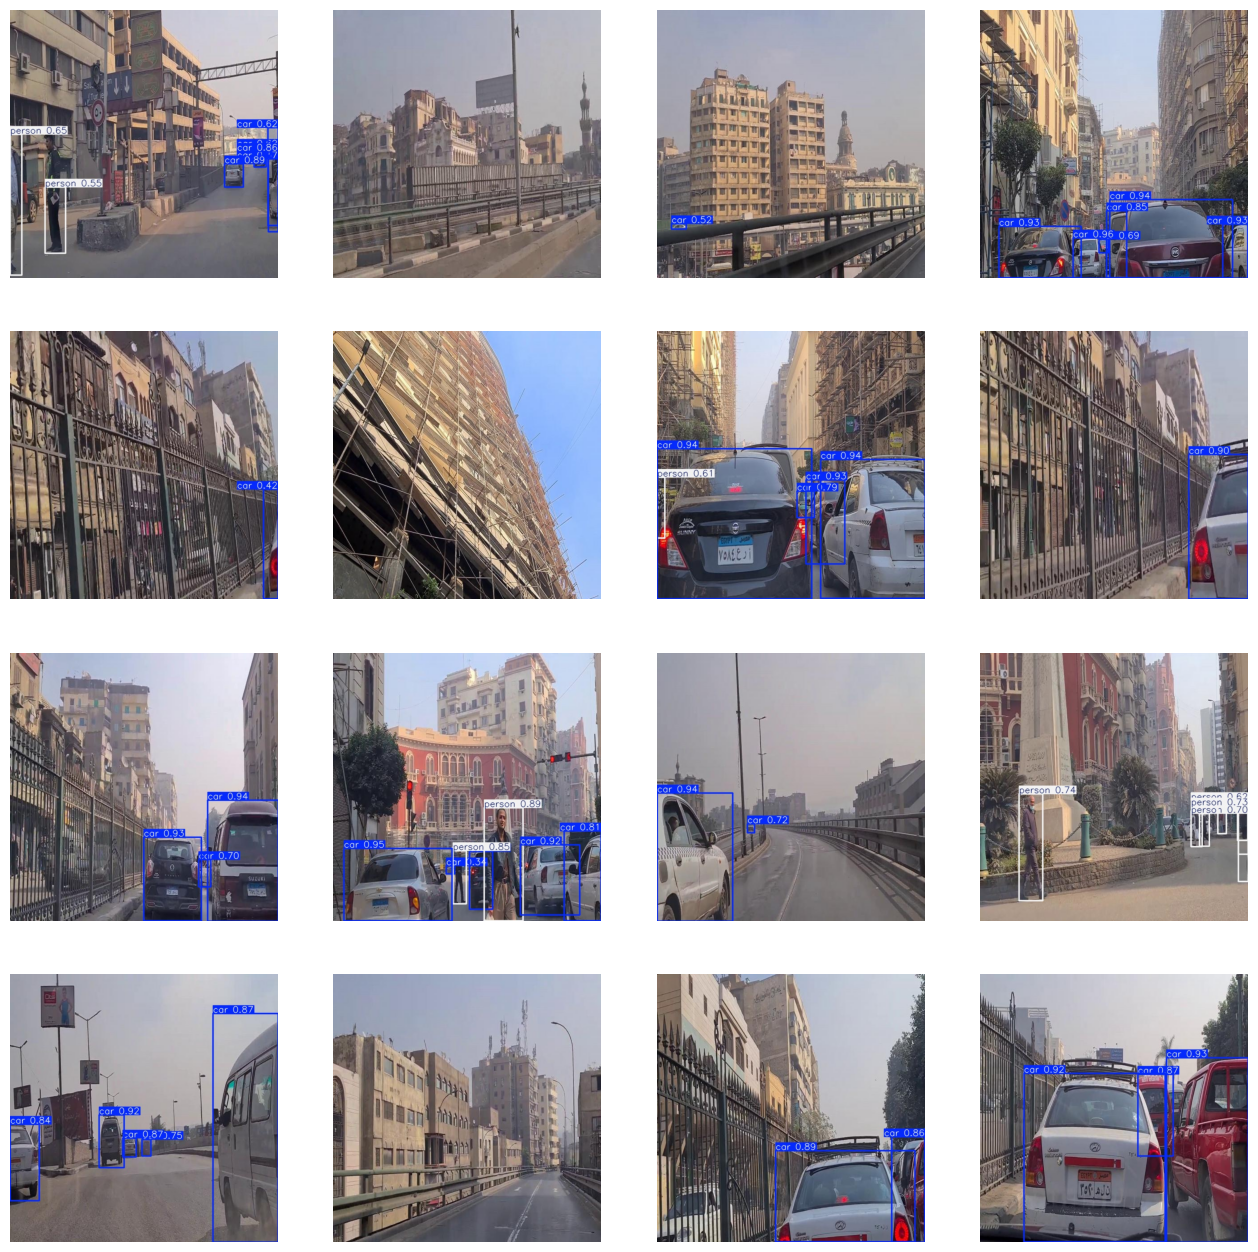

In [44]:
images_val = read_images_from_folder('/content/runs/detect/predict6','jpg')
sample_images = sample_images16(images_val)
show_images(sample_images)

In [48]:
# model = YOLO('yolov8n.pt')

model = YOLO('/content/runs/detect/train4/weights/best.pt')
result_2 = model('/content/Real image test', conf=0.25, save=True)


image 1/18 /content/Real image test/download (1).jpg: 448x640 1 car, 10.0ms
image 2/18 /content/Real image test/download (2).jpg: 480x640 (no detections), 7.9ms
image 3/18 /content/Real image test/download.jpg: 448x640 (no detections), 7.2ms
image 4/18 /content/Real image test/guided-bus-track-in-the-middle-of-autobahn-a40-in-essen-germany-EJ5T54.jpg: 640x416 18 cars, 1 person, 7.1ms
image 5/18 /content/Real image test/images (1).jpg: 448x640 (no detections), 7.4ms
image 6/18 /content/Real image test/images (10).jpg: 480x640 10 cars, 7.7ms
image 7/18 /content/Real image test/images (11).jpg: 640x480 6 cars, 40.8ms
image 8/18 /content/Real image test/images (2).jpg: 448x640 2 persons, 9.5ms
image 9/18 /content/Real image test/images (3).jpg: 384x640 2 cars, 1 motorbike, 4 persons, 7.7ms
image 10/18 /content/Real image test/images (4).jpg: 448x640 3 cars, 2 motorbikes, 4 persons, 7.9ms
image 11/18 /content/Real image test/images (5).jpg: 448x640 2 cars, 2 motorbikes, 3 persons, 6.6ms
im

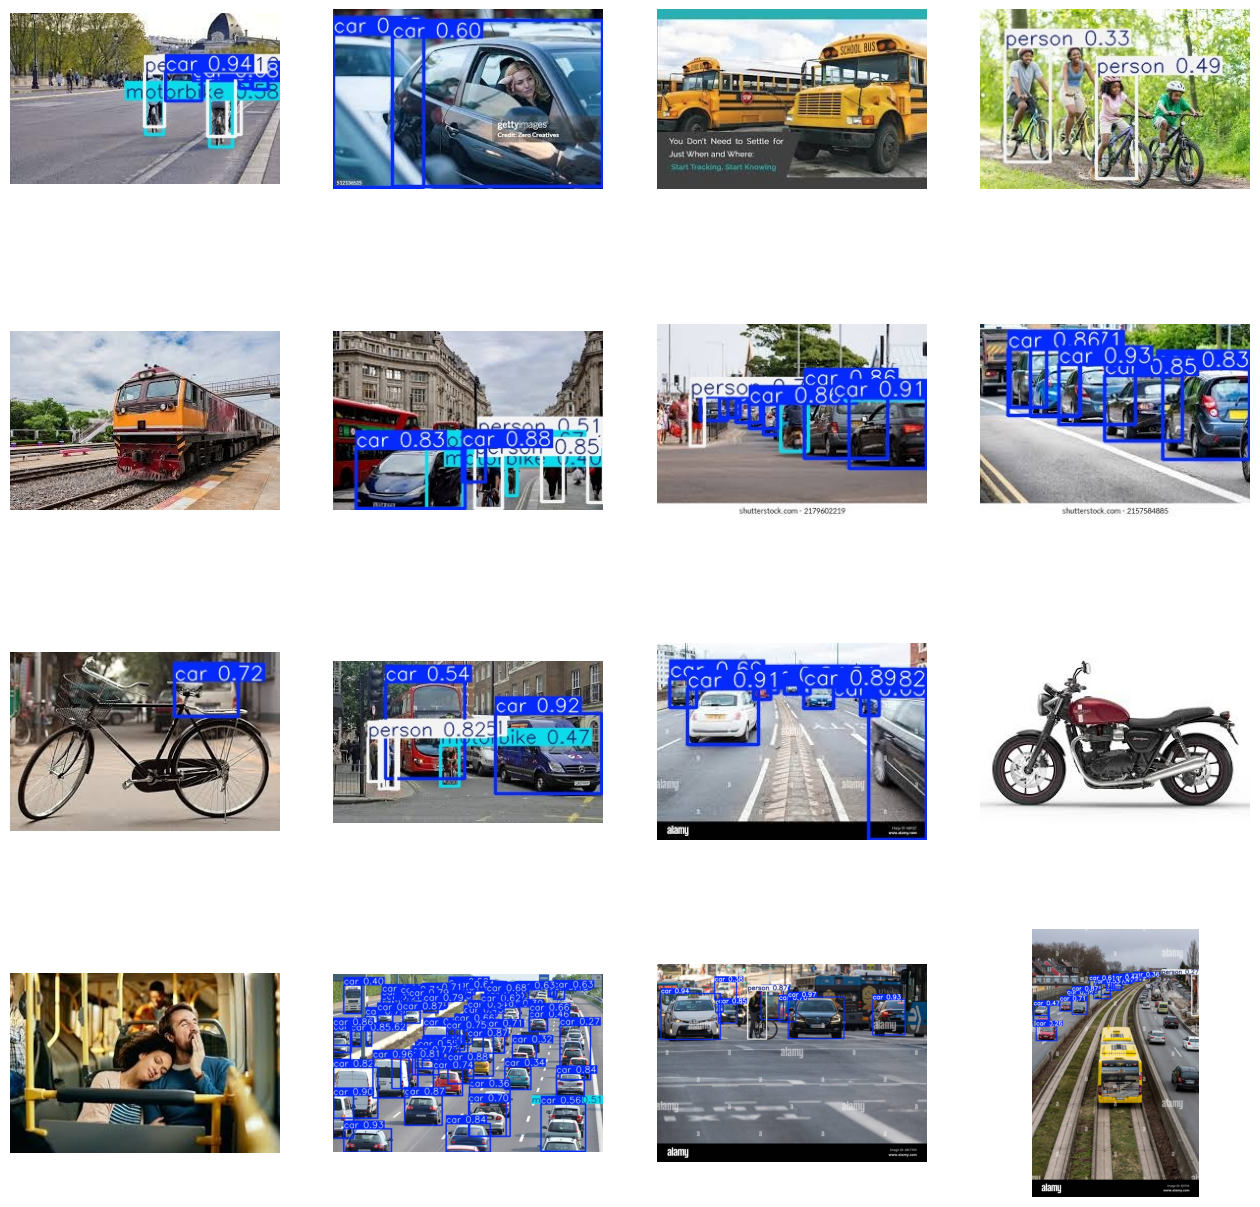

In [49]:
images_val = read_images_from_folder('runs/detect/predict8','jpg')
sample_images = sample_images16(images_val)
show_images(sample_images)